<a href="https://colab.research.google.com/github/GitTanmai/COVID-19/blob/master/Resume_Selector_with_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

In [6]:
from tika import parser
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
#Function to read resumes from the folder one by one


In [33]:
#!git clone https://github.com/GitTanmai/regression_ml.git


In [73]:
mypath_r='/content/regression_ml/Python Screen reject _/Python Screen reject' #enter your path here where you saved the resumes
onlyfiles_r = [os.path.join(mypath_r, f) for f in os.listdir(mypath_r) if os.path.isfile(os.path.join(mypath_r, f))]

mypath_s='/content/regression_ml/Python screen selects/Python screen selects' #enter your path here where you saved the resumes
onlyfiles_s = [os.path.join(mypath_s, f) for f in os.listdir(mypath_s) if os.path.isfile(os.path.join(mypath_s, f))]

In [74]:
reject=[]
for i in range(0, len(onlyfiles_r)):
    file = onlyfiles_r[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      reject.append(safe_text)
df_reject = pd.DataFrame(reject, columns = ['resume_text' ])
df_reject['class']='rejected'
df_reject.head(1)

,resume_text,class
0,"Praveen Kumar Python Developer Email: praveenkrrc@gmail.com http://kumar-praveen.com/ Contact No: +91-9716817710 | Age: 27 Professional Snapshot   Presently working with Fidelity International, Gurgaon as an Analyst Programmer - Python.  Hold total working experience of 5.5 years in IT Industry.  Have served for 3.8 years in TCS, Gurgaon.  Experience in all activities of Software Development Life Cycle (SDLC) and Agile methodologies, with good project implementation experience, maintenance support, team skills and issue resolution capabilities.  1.5 years of working experience during graduation with Logixinfo Solutions Pvt Ltd followed by 6 months of working with Robo Sapiens technologies in the area of Controllers and Automation. Skills Set  Technical:- 1. Tech Skills Python3 ,Django, Data Science ,Rest API,AWS 2. Tools Putty, WinScp, Oracle SQL Developer,...",rejected


In [75]:
select=[]
for i in range(0, len(onlyfiles_s)):
    file = onlyfiles_s[i]
    if 'pdf' in file:
      #print(file)
      parsed_pdf = parser.from_file(file)
      data = parsed_pdf['content'] 
      safe_text = data.replace("\n", "").replace("\\", "")
      #print(safe_text)
      select.append(safe_text)
df_select = pd.DataFrame(select, columns = ['resume_text' ])
df_select['class']='selected'
df_select.head(1)


,resume_text,class
0,"SHRUTI JOSHI Data Analyst | Python Developer | ETL Developer shruti4_u@hotmail.com 8585966768, 9650695454 https://www.linkedin.com/in/shruti-joshi-11209379/ HIGHLIGHTS • 6+ years of experience in designing and development of ETL, API, Python based solutions. • Working across various ETL Tools and Technologies – SQL, Oracle DB, Unix, PLSQL, Informatica, Python, Control M, etc. • Data Analysis through Python (Pandas) and Microsoft Excel. • Data Cleaning and Processing using Python (Pandas) and PLSQL. • Reporting using Tableau, Power BI and Excel. • Experience in Big Data Technologies like Hadoop, Impala, etc. • Development and Deployment of REST APIs in Python on PaaS using Cloud Foundry. • Having experience with Oracle Database Administration tasks. • Having experience with Deployment Tools like SVN, bitbucket, Bamboo and Urban Deploy. • Experience in working in teams spread across various geographical locations, varying in skill set and domains. • Interested in learning new t...",selected


In [97]:
resume_df=df_reject.append(df_select, ignore_index=True) 

In [51]:
pd.options.display.max_colwidth = 1000

![image.png](attachment:image.png)

In [ ]:
# Data Source: https://www.kaggle.com/samdeeplearning/deepnlp

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [81]:
# install nltk
!pip install nltk

In [82]:
# install gensim
!pip install gensim

In [83]:
!pip install wordcloud

In [ ]:
pip install jupyterthemes

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


ModuleNotFoundError: ignored

MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

In [92]:
resume_df.head(1)
resume_df.tail(1)

,resume_text,class
71,"Sanni Kumar Gupta Block-E, Flat. No 516, Yadav Apartments Near Ram Medicos, DLF Phase 3, Gurgaon, Haryana Pin No: 122001 Contact No: +918142702000 Email Id: sannigupta10792@gmail.com Profile Summary • Experience in working with AWS services like: Amazon S3, Amazon EC2, Amazon EMR, Athena, Glue, Amazon System Manager, EMR Notebook. • Good understanding of Algorithms, Data-Structures Object-Oriented Programming (Oops). • Experienced in writing SQL Queries, functions, packages, tables, views, triggers and Strong experience in Data warehouse concepts. • Implemented discretization and binning, data wrangling: cleaning, transforming, merging and reshaping data frames • Experience with modern big data tools such as PySpark, Hive & Airflow. • Skilled in optimize, debugging/troubleshooting issues in complex applications. • Experience in working with different operating systems WINDOWS and LINUX. • Experience in continuo...",selected


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [93]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  72 non-null     object
 1   class        72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [94]:
# check for null values
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [95]:
resume_df['class'].value_counts()

selected    42
rejected    30
Name: class, dtype: int64

In [98]:
resume_df['class']=resume_df['class'].apply(lambda x:1 if x=='selected' else 0)
resume_df

,resume_text,class
0,"Praveen Kumar Python Developer Email: praveenkrrc@gmail.com http://kumar-praveen.com/ Contact No: +91-9716817710 | Age: 27 Professional Snapshot   Presently working with Fidelity International, Gurgaon as an Analyst Programmer - Python.  Hold total working experience of 5.5 years in IT Industry.  Have served for 3.8 years in TCS, Gurgaon.  Experience in all activities of Software Development Life Cycle (SDLC) and Agile methodologies, with good project implementation experience, maintenance support, team skills and issue resolution capabilities.  1.5 years of working experience during graduation with Logixinfo Solutions Pvt Ltd followed by 6 months of working with Robo Sapiens technologies in the area of Controllers and Automation. Skills Set  Technical:- 1. Tech Skills Python3 ,Django, Data Science ,Rest API,AWS 2. Tools Putty, WinScp, Oracle SQL Developer,...",0
1,"Microsoft Word - Bareera_Resume.docx Sensitivity: Internal & Restricted BAREERA SOHAIL H-803, Sangria Towers, Megapolis, Pune · 9656630154. Sohailbareera23@gmail.com ·https://www.linkedin.com/in/bareera-sohail-370331148 · BCA Graduate | 4.2 years of experience in Software Development | Good Knowledge of Python, Django, Database, Redis, SQL and NoSQL queries SKILLS  Python  Redis  Machine Learning  SQLite  HTML  REST APIs  Azure Webapps  HPPPM  Django  Numpy  Pandas  MySQL  CSS  MongoDB  Javascript  Java EXPERIENCE 10/2020 – PRESENT SENIOR PROJECT ENGINEER, WIPRO TECHNOLOGIES (CLIENT: BROADCOM)  Working on automating a reporting system in which taking the data from Oracle DB and generating an excel report.  Using python libraries such as xlsxwriter, openpyxl and xlwings to write the data in excel workbook.  Using machine learning libraries of python such as Pandas to work with the data.  Deployment is to be done on prime Linux server. 12/2018 – 09/2020 SO...",0
2,"Vaibhav Saxena Python Developer Contact 7895385614 iamvsjee@live.com LinkedIn Key Skills Python Summary Skilled developer and automation expert with 5 years to develop solutions for client needs, expedite, and improve tasks through automation. Creates novel solutions to accomplish targets, automate manual tasks, exceeding generally accepted techniques in both speed and accuracy. Eager to advance in python development, network automation and business goals through careful iteration and progressive developmental improvements. Always ready to learn new things and take initiatives. Networking Network Automation Network Testing Test Automation Mobile Network Testing OpenStack, GCP, AWS Flask Web Development Experience Jan 2016 - present I.T. Analyst • Tata Consultancy Services • Worked to create a web-based framework, using Python, to create, configure, diagnose network devices, and to automate test cases on them, with support for multiple users to use it simultaneously. • ...",0
3,"631, Punjabi Colony, Katra Meera, Shikohabad, U.P.-283135 Email: parassoni@live.com M: 0-8285479664 PARAS SONI DOB: 6th Dec. 1993 PROFESSIONAL SUMMARY ------------------------------------------------------------------------------------------------------------------------------------------------------------------ ➢ Overall 5+ years of experience on the application development side with around 3 years of experience as a Python developer and having working experience in various environments such as: Python, Django, HTML/CSS, Eclipse, AWS and Linux. ➢ Hands on experience on Elasticsearch, Docker, GIT, jQuery, javascript, shell scripting, Kibana, Prometheus and Grafana. ➢ Working experience on AWS Services (S3, Kinesis Data Streams, Kinesis Firehose, DynamoDB) QUALIFICATION ------------------------------------------------------------------------------------------------------------------------------------------------------------------ ➢ PROFESSIONAL QUALIFICATION ✓ 2011- 2015 - B....",0
4,"Asif Ahmed  +91-7057424124 Email: ahmedgnit@gmail.com Objective To secure a challenging position that

MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [99]:
class_1_df = resume_df[resume_df['class']==1]
class_1_df

,resume_text,class
30,"SHRUTI JOSHI Data Analyst | Python Developer | ETL Developer shruti4_u@hotmail.com 8585966768, 9650695454 https://www.linkedin.com/in/shruti-joshi-11209379/ HIGHLIGHTS • 6+ years of experience in designing and development of ETL, API, Python based solutions. • Working across various ETL Tools and Technologies – SQL, Oracle DB, Unix, PLSQL, Informatica, Python, Control M, etc. • Data Analysis through Python (Pandas) and Microsoft Excel. • Data Cleaning and Processing using Python (Pandas) and PLSQL. • Reporting using Tableau, Power BI and Excel. • Experience in Big Data Technologies like Hadoop, Impala, etc. • Development and Deployment of REST APIs in Python on PaaS using Cloud Foundry. • Having experience with Oracle Database Administration tasks. • Having experience with Deployment Tools like SVN, bitbucket, Bamboo and Urban Deploy. • Experience in working in teams spread across various geographical locations, varying in skill set and domains. • Interested in learning new t...",1
31,"RAHUL KHANNA Senior Big Data Engineer Total Experience: 3 .5 + Years Mobile -: +91 -7055340256/9457541957 Relevant Experience: 3+ Year Email -: rk.rahul22khanna@gmail.com PROFESSIONAL SUMMARY:: PG-Diploma in Big data Analytics from CDAC-KP(Bangalore) with 3+ years experience in Spark, Python, Machine Learning, Power BI. In-depth knowledge and understanding of big data analysis and building Machine learning models in Python with ability to use them to design solutions for complex business problems. Knowledge of Data Processing(ETL Process) using PySpark, Python. Excels at providing insi...",1
32,"AKSHAY NIGAM : +91-9968830525 : nigamakshay11@gmail.com Seasoned Data Engineer with strong hold on ETL, Data Analytics, Data lake implementation in on-prem and Cloud using Big Data & Spark. AREAS OF EXPERTISE PROFESSIONAL SUMMARY • Seasoned technology professional with Five years and Three months of experience in the space of Business Intelligence and Analytics with strong exposure towards Data Lake pipeline implementation using technologies like big data, Python, Spark and Scala. • Developed the complex frameworks around features such as ETL, Data Integration, Datalake ingestion, Audit Balance Control checks, Unit Testing, source file data quality checks before ingestion, Change Data Capture, Strong Entitlement Process in data lake, Orchestration, Error logging & notification process around Failures and SLA checks , auto scaling of processing resources in AWS , code validation frameworks. • Have 4+ years of hands-on experience in implementing solutions around Data Mig...",1
33,"AdelbertAkash Rai E-mail Id: rai.akash203@gmail.com Phone No: +919582050906, 8368553380 _____________________________________________________________________________________________________________ Objective: Seeking a employment that allows me to grow professionally, while being able to utilize my skills for the betterment of the organization with the best of my dedication and determination Profile:  Around 5.3 years of experience in information technology field primarily in Python scripting and Machine Learning.  Deliver solution according to agreed scope and time line.  Proactive and quick at learning new concepts.  Analyzing key features in Data (understanding data).  Understanding of data scraping and natural language processing.  Knowledge of Python, MySQL, BeautifulSoup, Machine Learning, NLTK, SpaCy,Pandas. Current Employer: Company: AgreeYa Solutions Designation: Sr...",1
34,"MAYURI PARDESHIJITESH TILOKANI B-24 Jhulelal Colony, Ajay Nagar, Ajmer (Rajasthan), India. +91 9610773252 | jitesh.eca.2009@gmail.com EDUCATIONAL QUALIFICATIONS Bachelor of Technology in Information Technology June 2013 Government Engineering College Ajmer, Rajasthan Technical University Ajmer (Rajasthan), India GPA: IV Year- 73.6%, III Year – 68.1%, II Year – 66.7%, I Year – 66.55% Higher Secondary School Certificate March 2009 St. Anselm’s Senior Secondary School, Cent

In [100]:
class_0_df=resume_df[resume_df['class']==0]
class_0_df

,resume_text,class
0,"Praveen Kumar Python Developer Email: praveenkrrc@gmail.com http://kumar-praveen.com/ Contact No: +91-9716817710 | Age: 27 Professional Snapshot   Presently working with Fidelity International, Gurgaon as an Analyst Programmer - Python.  Hold total working experience of 5.5 years in IT Industry.  Have served for 3.8 years in TCS, Gurgaon.  Experience in all activities of Software Development Life Cycle (SDLC) and Agile methodologies, with good project implementation experience, maintenance support, team skills and issue resolution capabilities.  1.5 years of working experience during graduation with Logixinfo Solutions Pvt Ltd followed by 6 months of working with Robo Sapiens technologies in the area of Controllers and Automation. Skills Set  Technical:- 1. Tech Skills Python3 ,Django, Data Science ,Rest API,AWS 2. Tools Putty, WinScp, Oracle SQL Developer,...",0
1,"Microsoft Word - Bareera_Resume.docx Sensitivity: Internal & Restricted BAREERA SOHAIL H-803, Sangria Towers, Megapolis, Pune · 9656630154. Sohailbareera23@gmail.com ·https://www.linkedin.com/in/bareera-sohail-370331148 · BCA Graduate | 4.2 years of experience in Software Development | Good Knowledge of Python, Django, Database, Redis, SQL and NoSQL queries SKILLS  Python  Redis  Machine Learning  SQLite  HTML  REST APIs  Azure Webapps  HPPPM  Django  Numpy  Pandas  MySQL  CSS  MongoDB  Javascript  Java EXPERIENCE 10/2020 – PRESENT SENIOR PROJECT ENGINEER, WIPRO TECHNOLOGIES (CLIENT: BROADCOM)  Working on automating a reporting system in which taking the data from Oracle DB and generating an excel report.  Using python libraries such as xlsxwriter, openpyxl and xlwings to write the data in excel workbook.  Using machine learning libraries of python such as Pandas to work with the data.  Deployment is to be done on prime Linux server. 12/2018 – 09/2020 SO...",0
2,"Vaibhav Saxena Python Developer Contact 7895385614 iamvsjee@live.com LinkedIn Key Skills Python Summary Skilled developer and automation expert with 5 years to develop solutions for client needs, expedite, and improve tasks through automation. Creates novel solutions to accomplish targets, automate manual tasks, exceeding generally accepted techniques in both speed and accuracy. Eager to advance in python development, network automation and business goals through careful iteration and progressive developmental improvements. Always ready to learn new things and take initiatives. Networking Network Automation Network Testing Test Automation Mobile Network Testing OpenStack, GCP, AWS Flask Web Development Experience Jan 2016 - present I.T. Analyst • Tata Consultancy Services • Worked to create a web-based framework, using Python, to create, configure, diagnose network devices, and to automate test cases on them, with support for multiple users to use it simultaneously. • ...",0
3,"631, Punjabi Colony, Katra Meera, Shikohabad, U.P.-283135 Email: parassoni@live.com M: 0-8285479664 PARAS SONI DOB: 6th Dec. 1993 PROFESSIONAL SUMMARY ------------------------------------------------------------------------------------------------------------------------------------------------------------------ ➢ Overall 5+ years of experience on the application development side with around 3 years of experience as a Python developer and having working experience in various environments such as: Python, Django, HTML/CSS, Eclipse, AWS and Linux. ➢ Hands on experience on Elasticsearch, Docker, GIT, jQuery, javascript, shell scripting, Kibana, Prometheus and Grafana. ➢ Working experience on AWS Services (S3, Kinesis Data Streams, Kinesis Firehose, DynamoDB) QUALIFICATION ------------------------------------------------------------------------------------------------------------------------------------------------------------------ ➢ PROFESSIONAL QUALIFICATION ✓ 2011- 2015 - B....",0
4,"Asif Ahmed  +91-7057424124 Email: ahmedgnit@gmail.com Objective To secure a challenging position that

# TASK #4: PERFORM DATA CLEANING

In [110]:
resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r',''))

In [ ]:
resume_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [109]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re'])

In [111]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [112]:
# Cleaned text
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)

In [115]:
print(resume_df['cleaned'][0])

praveen kumar python developer email praveenkrrc gmail com http kumar praveen com contact age professional snapshot presently working fidelity international gurgaon analyst programmer python hold total working experience years industry served years tcs gurgaon experience activities software development life cycle sdlc agile methodologies good project implementation experience maintenance support team skills issue resolution capabilities years working experience graduation logixinfo solutions pvt followed months working robo sapiens technologies area controllers automation skills set technical tech skills python django data science rest api aws tools putty winscp oracle sql developer git jira teamcity svn stash matlab avr arduino ctu pychamp hid bootflash contolm database oracle controller atemga arduino rasberry programming python unix embedded functional strong analytical requirements elicitation skills estimation impact analysis design development code review production support proce

In [116]:
print(resume_df['resume_text'][0])

Praveen Kumar                                            Python Developer  Email: praveenkrrc@gmail.com  http://kumar-praveen.com/                                                                   Contact No: +91-9716817710 | Age: 27  Professional Snapshot   Presently working with Fidelity International, Gurgaon as an Analyst Programmer - Python.  Hold total working experience of 5.5 years in IT Industry.  Have served for 3.8 years in TCS, Gurgaon.    Experience in all activities of Software Development Life Cycle (SDLC) and Agile methodologies, with good project implementation experience, maintenance support, team skills and issue resolution capabilities.  1.5 years of working experience during graduation with Logixinfo Solutions Pvt Ltd followed by 6 months of working with Robo Sapiens technologies in the area of Controllers and Automation.  Skills Set       Technical:- 1. Tech Skills Python3 ,Django, Data Science ,Rest API,AWS 2. Tools Putty, WinScp, Oracle SQL Developer, GIT

# TASK #5: VISUALIZE CLEANED DATASET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


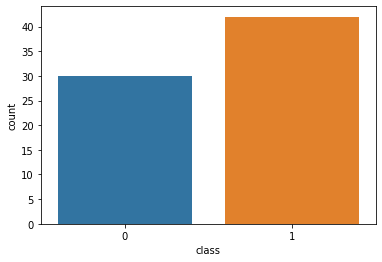

In [117]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df['class'],label='count_plot')

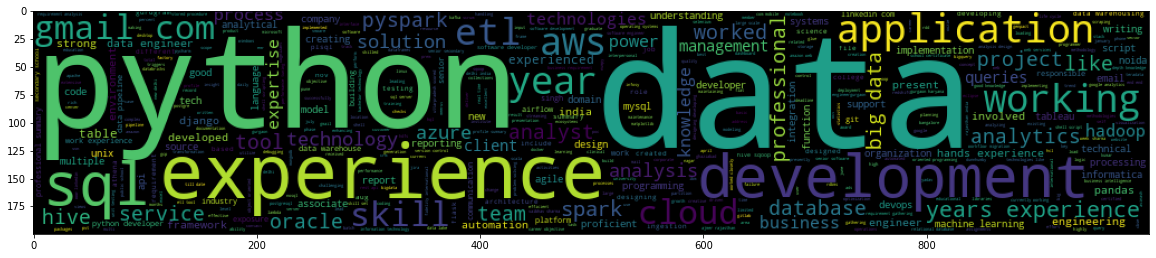

In [118]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1000,height=200,stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].
cleaned))
plt.imshow(wc)

MINI CHALLENGE #3:
- Plot the wordcloud for class #1 

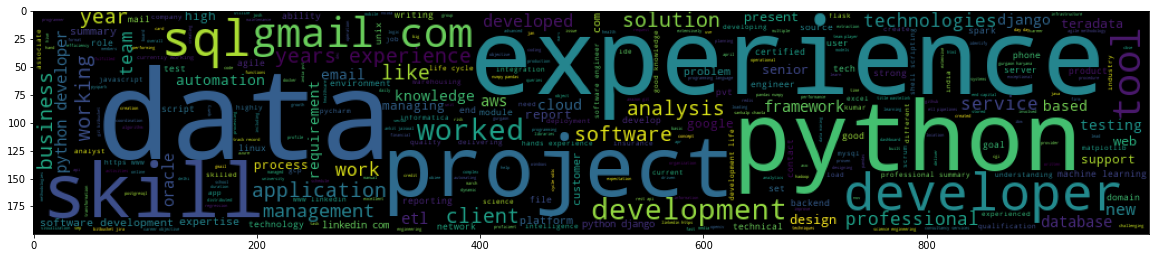

In [119]:
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1000,height=200,stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].
cleaned))
plt.imshow(wc)

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

![image.png](attachment:image.png)

In [129]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
#sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer=CountVectorizer()
countvectorizer= vectorizer.fit_transform(resume_df['cleaned'])

In [127]:
print(vectorizer.get_feature_names())

['aadhar', 'abacus', 'abby', 'abc', 'abes', 'abesec', 'abhi', 'abhishek', 'abide', 'abilities', 'ability', 'abis', 'abiwin', 'able', 'abstract', 'abuse', 'academia', 'academic', 'academics', 'academy', 'acccuracy', 'accelerates', 'accelerator', 'accelerometer', 'accenture', 'accenturedata', 'acceptance', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accident', 'accolades', 'accomplish', 'accomplishment', 'accomplishments', 'accordance', 'according', 'accordingly', 'account', 'accountable', 'accounted', 'accounting', 'accounts', 'accountstring', 'accruals', 'accumulator', 'accuracy', 'accurate', 'achieve', 'achieved', 'achievement', 'achievements', 'achiever', 'achieving', 'acknowledgement', 'acl', 'aco', 'acor', 'acord', 'acos', 'acp', 'acquainted', 'acquired', 'acquiring', 'acquisition', 'acs', 'act', 'acting', 'action', 'actionable', 'actions', 'active', 'activeconveyor', 'actively', 'activities', 'activity', 'actvities', 'acumen', 'adapt', 'adaptable', 'add', 'added',

In [130]:
countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [131]:
X=countvectorizer

In [133]:
y=resume_df['class']

In [134]:
X.shape

(72, 6056)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

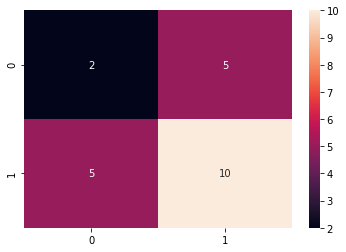

In [137]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)


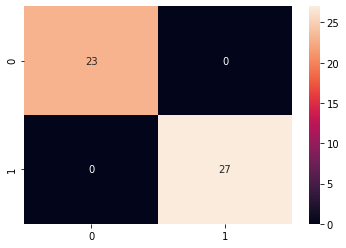

In [139]:
#training data model
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [140]:

# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       0.67      0.67      0.67        15

    accuracy                           0.55        22
   macro avg       0.48      0.48      0.48        22
weighted avg       0.55      0.55      0.55        22



# TASK#9: TRAIN NAIVE BAYES CLASSIFIER MODEL

(125, 11314)

(125,)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MINI CHALLENGE #5:
- Split the data into 25% testing and 75% training and perform a sanity check



# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


![image.png](attachment:image.png)

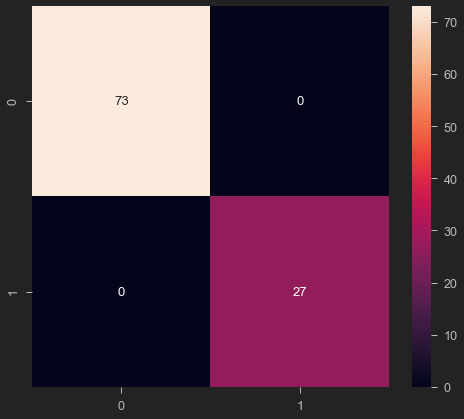

In [ ]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

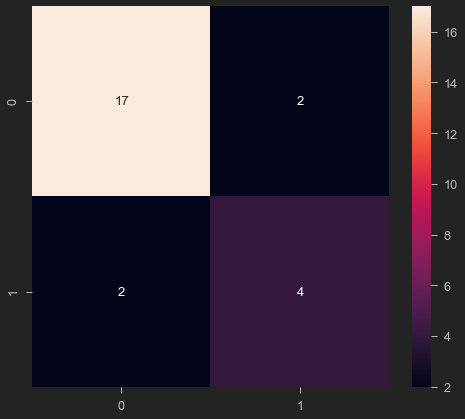

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.67      0.67      0.67         6

    accuracy                           0.84        25
   macro avg       0.78      0.78      0.78        25
weighted avg       0.84      0.84      0.84        25



MINI CHALLENGE #6:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


# GREAT JOB!

# MINI CHALLENGES SOLUTIONS

MINI CHALLENGE #1 SOLUTION: 
- Print the first and last elements in the dataframe. 

In [ ]:
resume_df.head()

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...


In [ ]:
resume_df.tail()

,resume_text,class,cleaned
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...
124,Research and Development Scientist - Burlingto...,0,research development scientist burlington cda ...


MINI CHALLENGE #2 SOLUTION:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [ ]:
class_0_df = resume_df[resume_df['class']==0]
class_0_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
5,Poultney VT - Email me on Indeed: indeed.com/r...,0,poultney cbf fba organized independent worker ...
...,...,...,...
119,ProfessionalNewbury VT - Email me on Indeed: i...,0,faeb work college hanover june technologist pe...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...


In [ ]:
class_1_df = resume_df[resume_df['class']==1]
class_1_df

,resume_text,class,cleaned
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
7,StatisticianBurlington VT - Email me on Indeed...,1,secure position allow growth development work ...
10,Barbara KurthResearch Assistant Professor Clin...,1,barbara kurthresearch assistant professor clin...
15,Caroline Clauson Work Study StudentBrattleboro...,1,caroline clauson work study caroline clauson c...
17,Chelsea MartinEnvironmental Scientist - Vanass...,1,chelsea scientist vanasse hangen brustlin vhb ...
18,Christopher Fusting Data Science ConsultantBur...,1,christopher fusting data science christopher f...
23,David GrassCity Research Scientist - Environme...,1,david grasscity research scientist environment...
24,David Lucero Public Health AnalystBurlington V...,1,david lucero public health david lucero work r...
27,Drew BurkhardEnvironmental Scientist Meets Mec...,1,drew scientist meets mechanical drew burkhard ...
31,Eric Anderson Data ScientistBrattleboro VT - E...,1,eric anderson data eric anderson adfe looking ...


MINI CHALLENGE #3 SOLUTION:
- Plot the wordcloud for class #1 

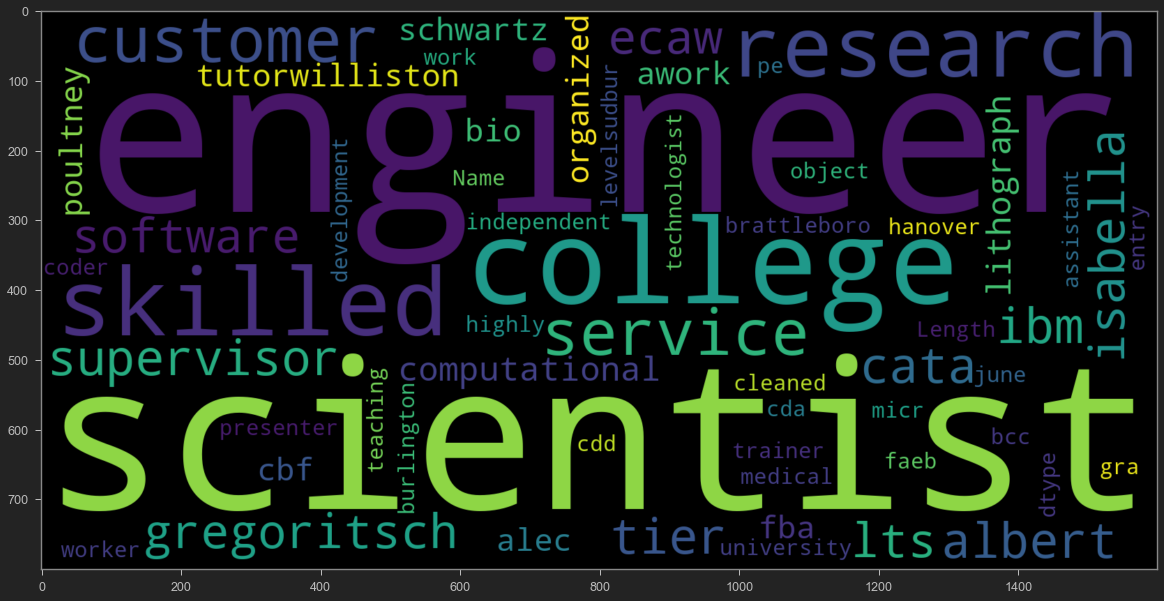

In [ ]:
# plot the word cloud for text that is not flagged
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(str(resume_df[resume_df['class'] == 0].cleaned))
plt.imshow(wc , interpolation = 'bilinear')

MINI CHALLENGE #4 SOLUTION:
- Calculate the probability of the red class (non-retiring).

![image.png](attachment:image.png)

MINI CHALLENGE #5 SOLUTION:
- Split the data into 25% testing and 75% training and perform a sanity check


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

MINI CHALLENGE #6 SOLUTION:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.83      0.56      0.67         9

    accuracy                           0.87        38
   macro avg       0.85      0.76      0.79        38
weighted avg       0.87      0.87      0.86        38



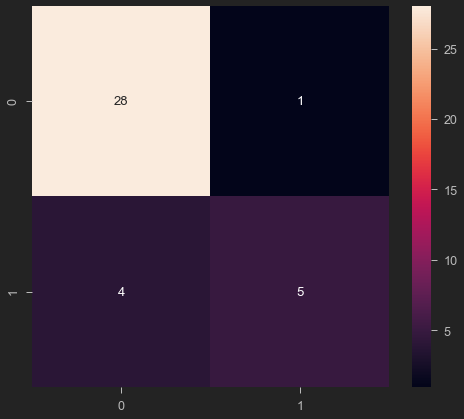

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

# classification report
print(classification_report(y_test, y_predict_test))